# Project - EDA with Pandas Using the Ames Housing Data

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this more free-form project, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains housing values in the suburbs of Ames.

## Objectives

You will be able to:

* Perform a full exploratory data analysis process to gain insight about a dataset 

## Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At a minimum, this should include:

* Loading the data (which is stored in the file ``ames_train.csv``) 
* Use built-in Python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations like `.loc`, `.iloc`, or related operations.   Explain why you used the chosen subsets and do this for three possible 2-way splits. State how you think the two measures of centrality and/or dispersion might be different for each subset of the data.
* Next, use histograms and scatter plots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

## Variable Descriptions
Look in ``data_description.txt`` for a full description of all variables.

A preview of some of the columns:

**MSZoning**: Identifies the general zoning classification of the sale.
		
       A	 Agriculture
       C	 Commercial
       FV	Floating Village Residential
       I	 Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

**OverallCond**: Rates the overall condition of the house

       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor

**KitchenQual**: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

**YrSold**: Year Sold (YYYY)

**SalePrice**: Sale price of the house in dollars

In [2]:
# Let's get started importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [6]:
# Loading the data
df = pd.read_csv('ames_train.csv')
print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Investigate the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

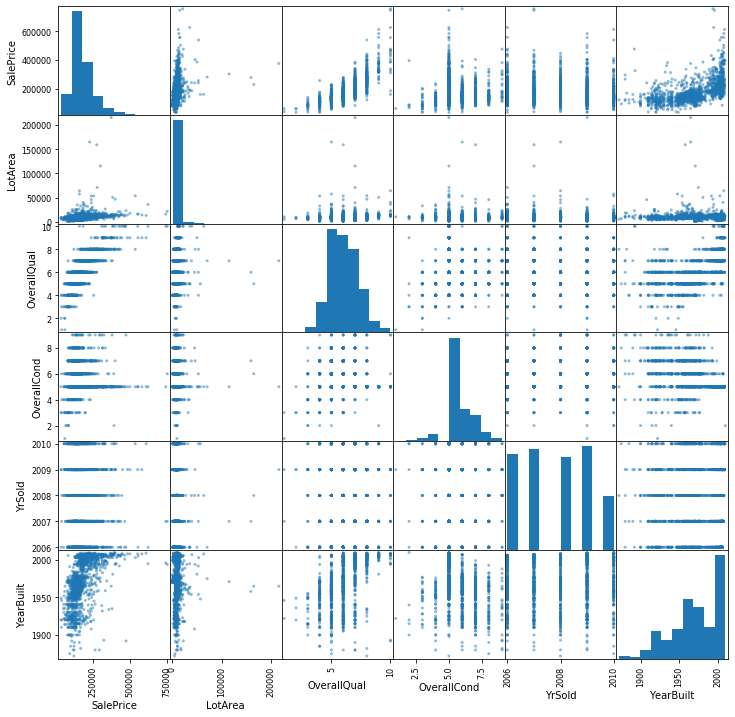

In [9]:
# Investigating Distributions using scatter_matrix 
pd.plotting.scatter_matrix(df[['SalePrice', 'LotArea', 'OverallQual', 'OverallCond', 
                               'YrSold', 'YearBuilt']], figsize=(12,12));

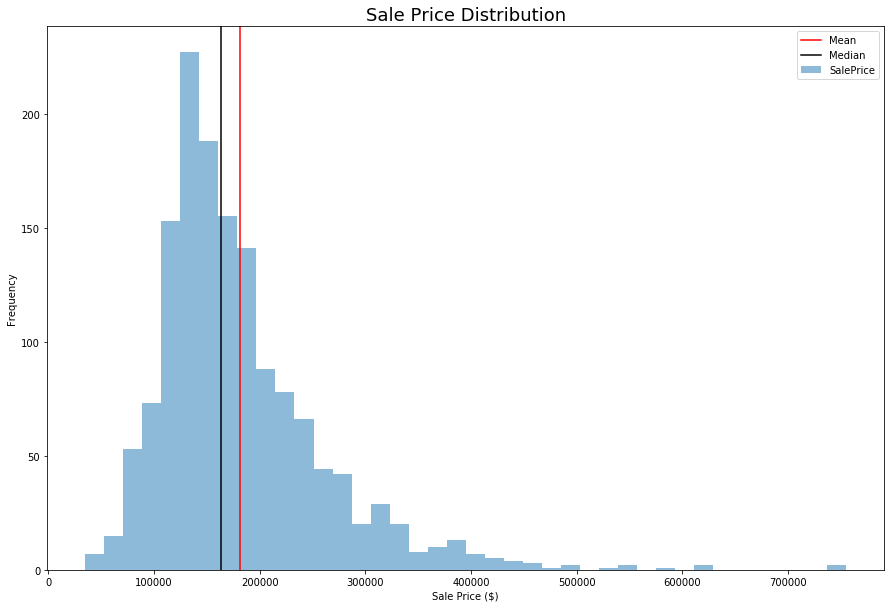

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [99]:
# Create a plot that shows the SalePrice Distribution
df['SalePrice'].plot.hist(alpha=0.5, bins=40, figsize=(15,10))
plt.title('Sale Price Distribution',fontsize=18)
plt.xlabel('Sale Price ($)')
plt.axvline(x=df['SalePrice'].mean(),c='r', label='Mean')
plt.axvline(x=df['SalePrice'].median(),c='k', label='Median')
plt.legend()
plt.show()
df['SalePrice'].describe()

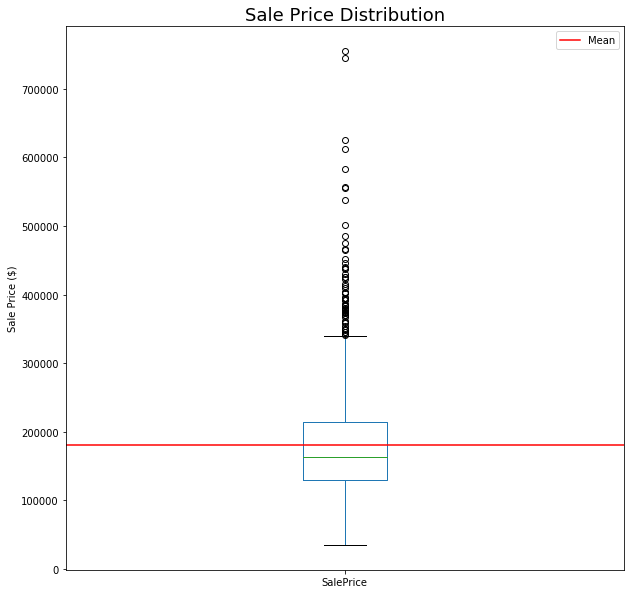

In [100]:
# Sale Price boxplot
df['SalePrice'].plot.box(figsize=(10,10))
plt.title('Sale Price Distribution',fontsize=18)
plt.ylabel('Sale Price ($)')
plt.axhline(y=df['SalePrice'].mean(),c='r', label='Mean')
plt.legend()
plt.show()

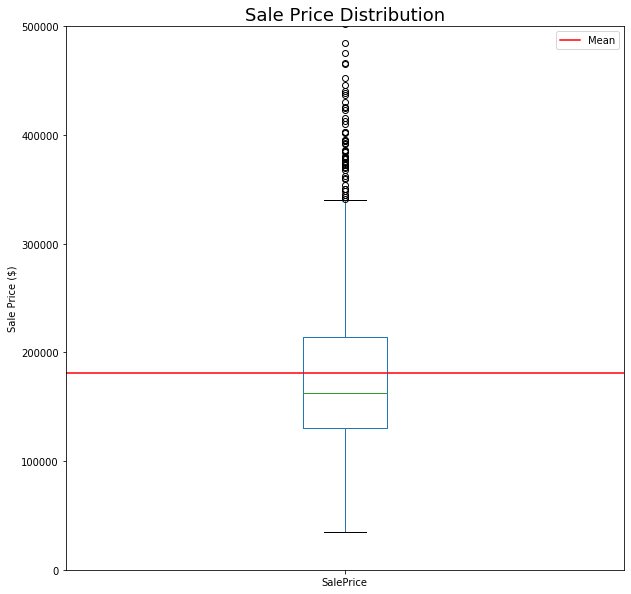

In [113]:
# Sale Price boxplot (excl some outliers from view)
df['SalePrice'].plot.box(figsize=(10,10), ylim=(0,500000))
plt.title('Sale Price Distribution',fontsize=18)
plt.ylabel('Sale Price ($)')
plt.axhline(y=df['SalePrice'].mean(),c='r', label='Mean')
plt.legend()
plt.show()

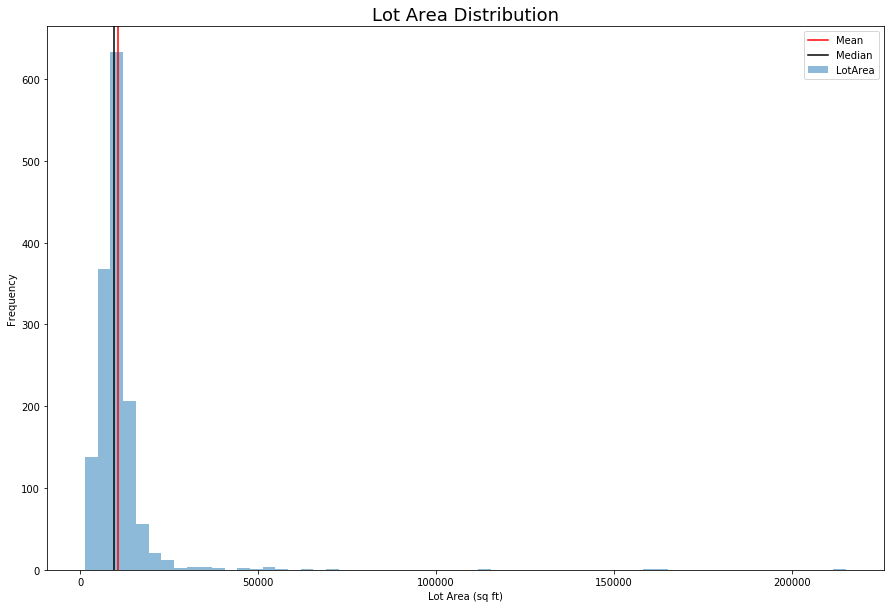

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [101]:
# Create a plot that shows the LotArea Distribution
df['LotArea'].plot.hist(alpha=0.5, bins=60, figsize=(15,10))
plt.title('Lot Area Distribution',fontsize=18)
plt.xlabel('Lot Area (sq ft)')
plt.axvline(x=df['LotArea'].mean(),c='r', label='Mean')
plt.axvline(x=df['LotArea'].median(),c='k', label='Median')
plt.legend()
plt.show()
df['LotArea'].describe()

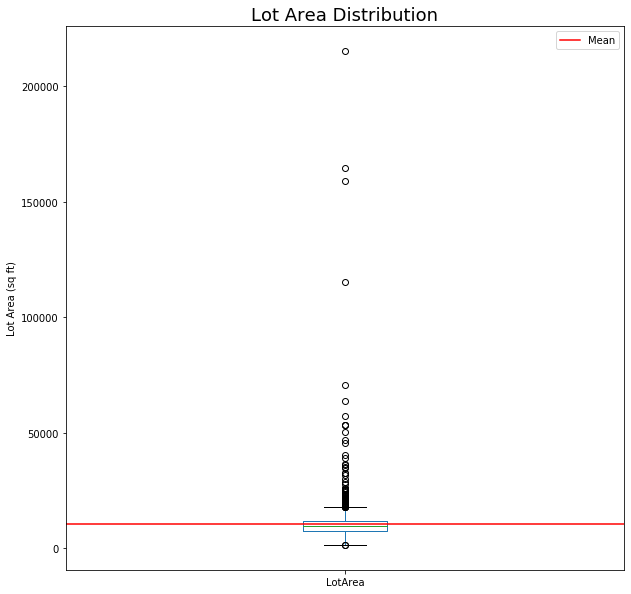

In [102]:
# Lot Area boxplot
df['LotArea'].plot.box(figsize=(10,10))
plt.title('Lot Area Distribution',fontsize=18)
plt.ylabel('Lot Area (sq ft)')
plt.axhline(y=df['LotArea'].mean(),c='r', label='Mean')
plt.legend()
plt.show()

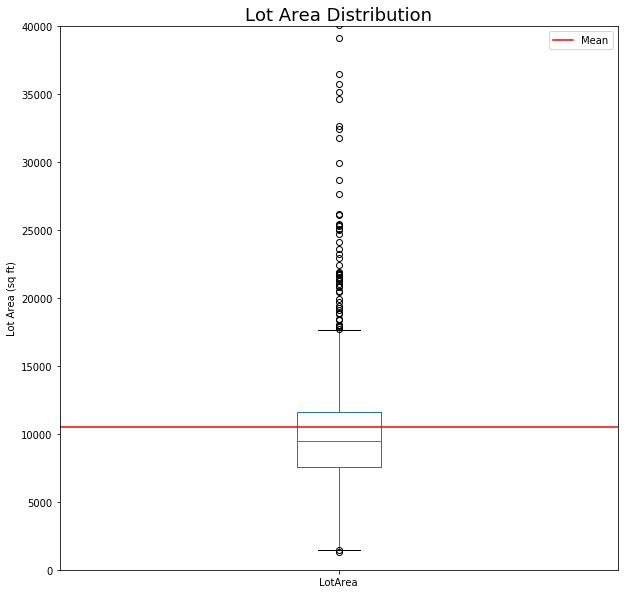

In [103]:
# Lot Area boxplot (excl some outliers from view)
df['LotArea'].plot.box(figsize=(10,10), ylim=(0,40000))
plt.title('Lot Area Distribution',fontsize=18)
plt.ylabel('Lot Area (sq ft)')
plt.axhline(y=df['LotArea'].mean(),c='r', label='Mean')
plt.legend()
plt.show()

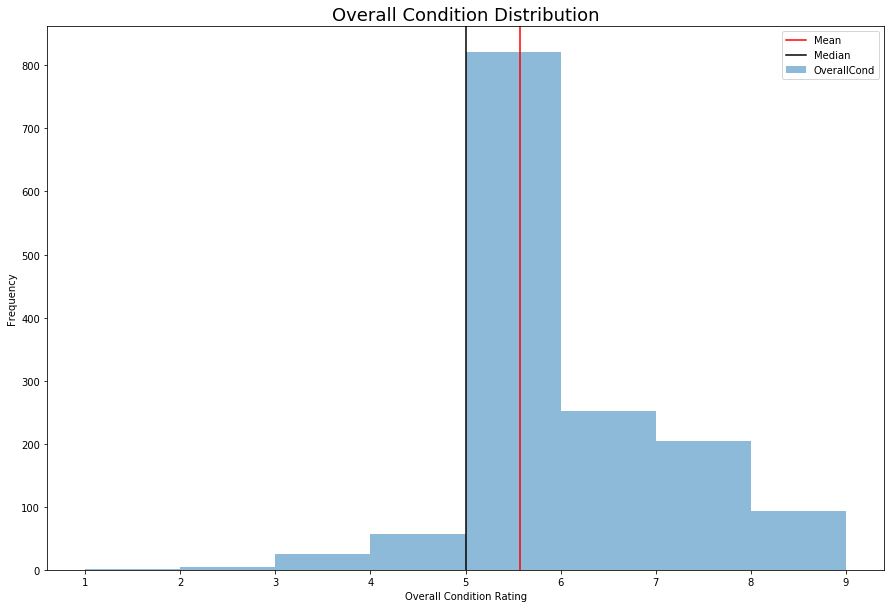

5    0.562329
6    0.172603
7    0.140411
8    0.049315
4    0.039041
3    0.017123
9    0.015068
2    0.003425
1    0.000685
Name: OverallCond, dtype: float64


count    1460.000000
mean        5.575342
std         1.112799
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64

In [104]:
# Create a plot that shows the Distribution of the overall house condition
df['OverallCond'].plot.hist(alpha=0.5, bins=8, figsize=(15,10))
plt.title('Overall Condition Distribution',fontsize=18)
plt.xlabel('Overall Condition Rating')
plt.axvline(x=df['OverallCond'].mean(),c='r', label='Mean')
plt.axvline(x=df['OverallCond'].median(),c='k', label='Median')
plt.legend()
plt.show()
print(df['OverallCond'].value_counts(normalize=True))
df['OverallCond'].describe()

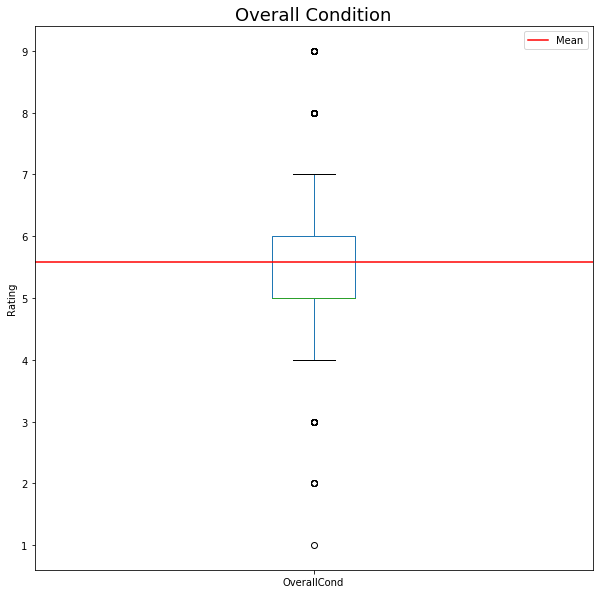

In [105]:
# Overall Condition boxplot
df['OverallCond'].plot.box(figsize=(10,10))
plt.title('Overall Condition',fontsize=18)
plt.ylabel('Rating')
plt.axhline(y=df['OverallCond'].mean(),c='r', label='Mean')
plt.legend()
plt.show()

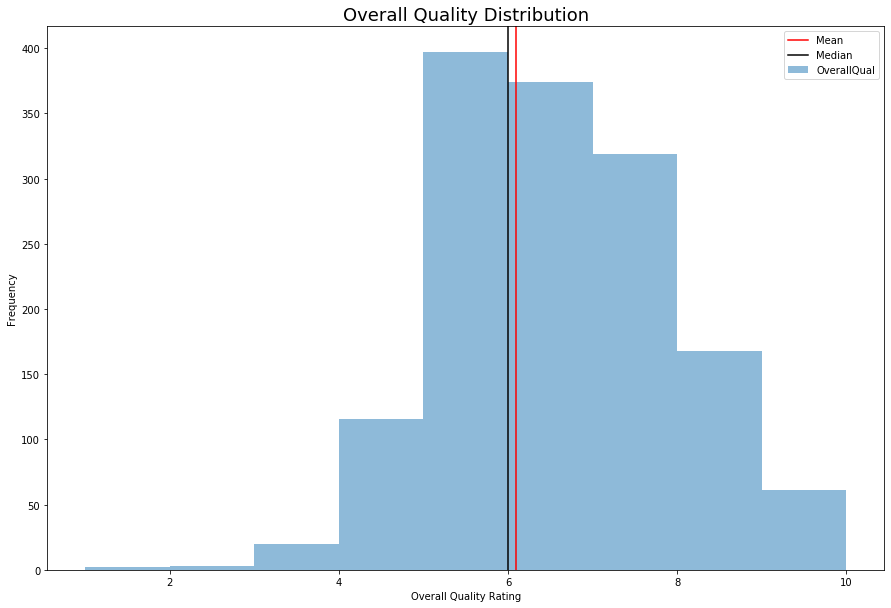

5     0.271918
6     0.256164
7     0.218493
8     0.115068
4     0.079452
9     0.029452
3     0.013699
10    0.012329
2     0.002055
1     0.001370
Name: OverallQual, dtype: float64


count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

In [106]:
# Create a plot that shows the OverallQual Distribution
df['OverallQual'].plot.hist(alpha=0.5, bins=9, figsize=(15,10))
plt.title('Overall Quality Distribution',fontsize=18)
plt.xlabel('Overall Quality Rating')
plt.axvline(x=df['OverallQual'].mean(),c='r', label='Mean')
plt.axvline(x=df['OverallQual'].median(),c='k', label='Median')
plt.legend()
plt.show()
print(df['OverallQual'].value_counts(normalize=True))
df['OverallQual'].describe()

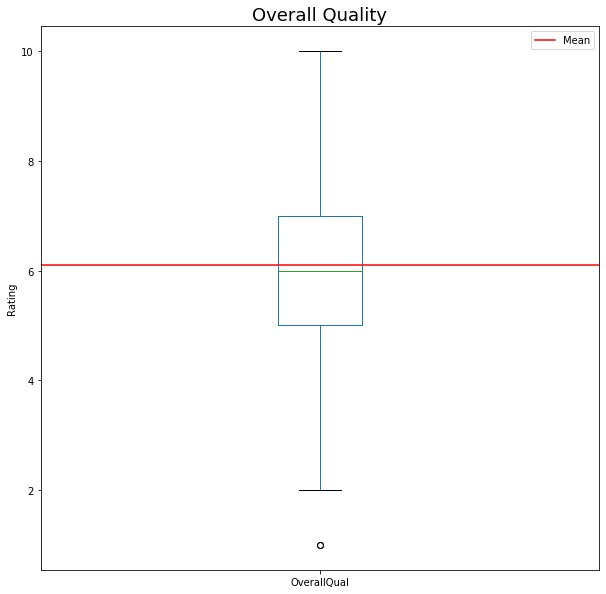

In [107]:
# Overall Quality boxplot
df['OverallQual'].plot.box(figsize=(10,10))
plt.title('Overall Quality',fontsize=18)
plt.ylabel('Rating')
plt.axhline(y=df['OverallQual'].mean(),c='r', label='Mean')
plt.legend()
plt.show()

In [70]:
df['YrSold'].describe()

count    1460.000000
mean     2007.815753
std         1.328095
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64

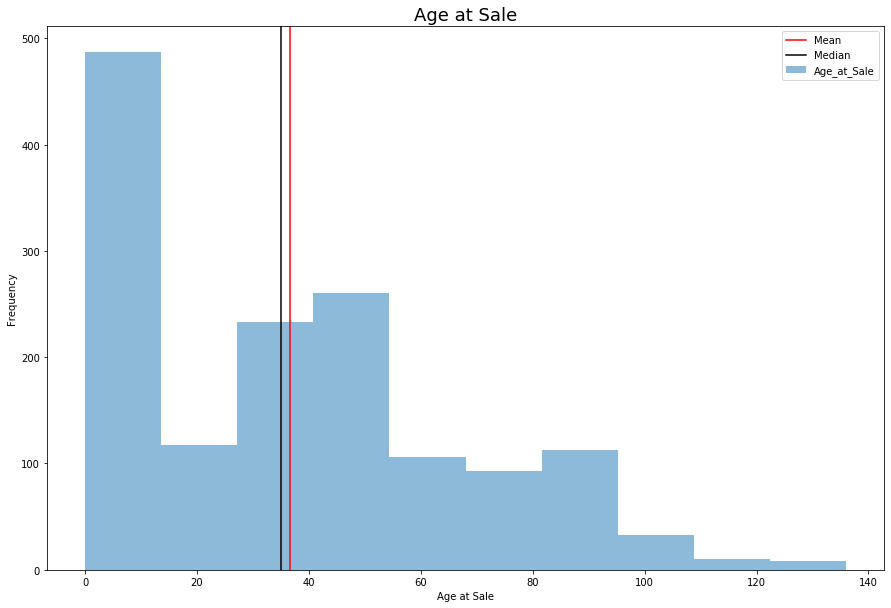

1      0.068493
0      0.043836
4      0.028082
2      0.026712
3      0.024658
         ...   
79     0.000685
109    0.000685
135    0.000685
107    0.000685
136    0.000685
Name: Age_at_Sale, Length: 122, dtype: float64


count    1460.000000
mean       36.547945
std        30.250152
min         0.000000
25%         8.000000
50%        35.000000
75%        54.000000
max       136.000000
Name: Age_at_Sale, dtype: float64

In [108]:
# Perform an Exploration of home values by age
### Create 'Age_at_Sale' col based on difference btwn YrSold and YearBuilt
df['Age_at_Sale'] = df['YrSold'] - df['YearBuilt']

# Create a plot that shows the Age_at_Sale Distribution
df['Age_at_Sale'].plot.hist(alpha=0.5, figsize=(15,10))
plt.title('Age at Sale',fontsize=18)
plt.xlabel('Age at Sale')
plt.axvline(x=df['Age_at_Sale'].mean(),c='r', label='Mean')
plt.axvline(x=df['Age_at_Sale'].median(),c='k', label='Median')
plt.legend()
plt.show()
print(df['Age_at_Sale'].value_counts(normalize=True))
df['Age_at_Sale'].describe()

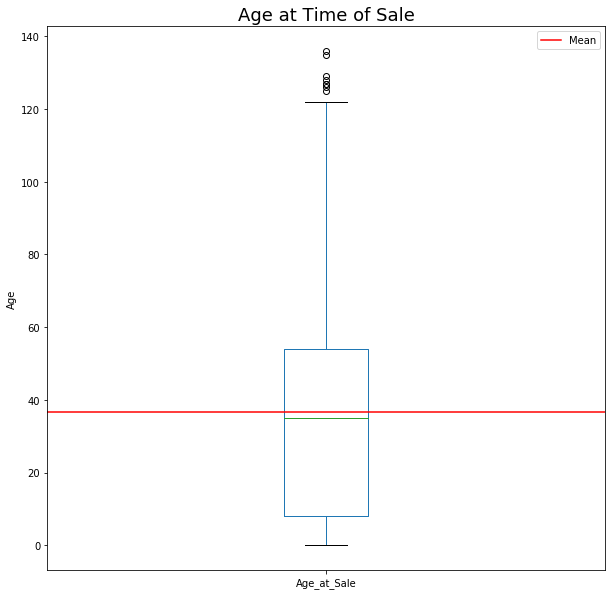

In [109]:
# Age at Sale boxplot
df['Age_at_Sale'].plot.box(figsize=(10,10))
plt.title('Age at Time of Sale',fontsize=18)
plt.ylabel('Age')
plt.axhline(y=df['Age_at_Sale'].mean(),c='r', label='Mean')
plt.legend()
plt.show()

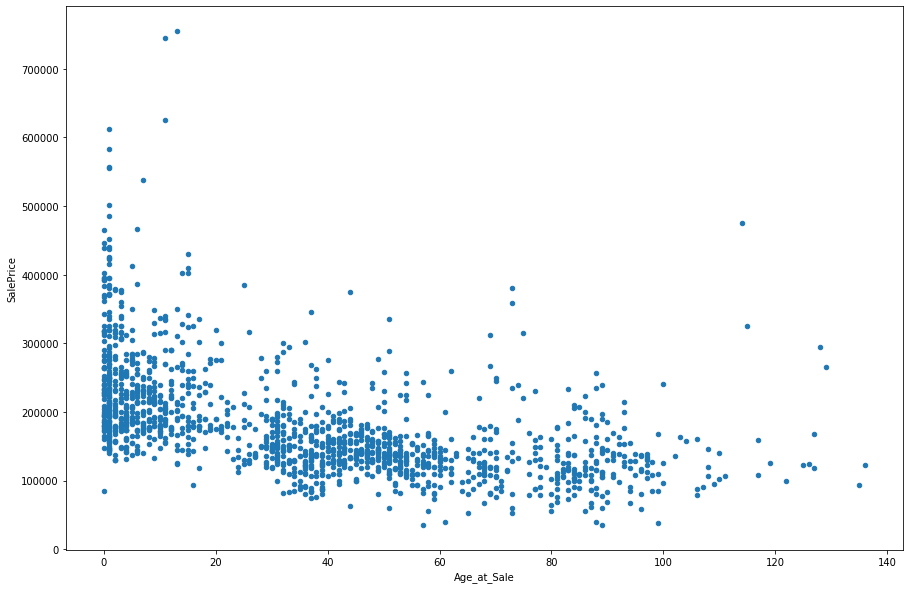

In [111]:
#### Start exploration of relationship with a scatter plot of SalePrice as a function of Age_at_Sale
df.plot.scatter('Age_at_Sale', 'SalePrice', figsize=(15,10));

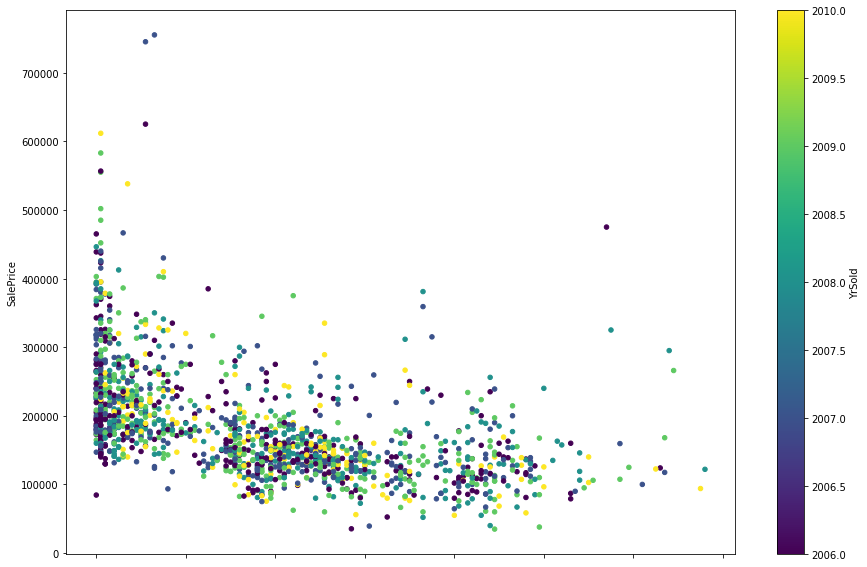

In [112]:
df.plot.scatter('Age_at_Sale', 'SalePrice', 
                  c = 'YrSold',
                  colormap = 'viridis', 
                  figsize=(15,10));

In [95]:
# Check correlation of Age at Sale and Sale Price
display(np.corrcoef(df['Age_at_Sale'], df['SalePrice'])) # the 2 variables are negatively correlated
                                                         # as age increases, sale price tends to decrease
                                                         # possibly driven by a few outliers

array([[ 1.        , -0.52335042],
       [-0.52335042,  1.        ]])

In [ ]:
### Create meaningful subsets of the data using selection operations like .loc, .iloc, or related operations. 
### Explain why you used the chosen subsets and do this for three possible 2-way splits. 
### State how you think the 2 measures of centrality and/or dispersion might be diff for ea subset of the data.

## Summary

Congratulations, you've completed your first "free form" exploratory data analysis of a popular dataset!